In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

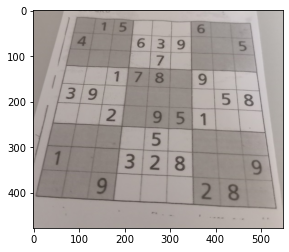

In [2]:
imframe = Image.open('sudoku.jpg')
plt.imshow(imframe)

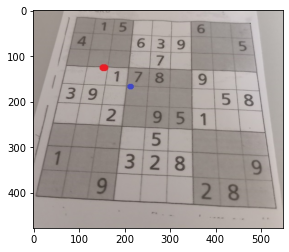

In [3]:
imframe2 = Image.open('sudoku2.jpg')
plt.imshow(imframe2)

In [4]:
#
np3D=np.array(imframe)
print(np3D.shape)
#convertim a numpy de 2D (pixels, codiRGB)
npframe = np.array(imframe.getdata())
npframe2= np.array(imframe2.getdata())
#i ara a dataframe
imgrgbdf = pd.DataFrame(npframe)
imgrgbdf=imgrgbdf.rename(columns={0:"R",1:"G",2:"B"})
imgrgbdf2 = pd.DataFrame(npframe2)
imgrgbdf["R2"]=imgrgbdf2[0]
imgrgbdf["G2"]=imgrgbdf2[1]
imgrgbdf["B2"]=imgrgbdf2[2]
imgrgbdf["a"]=imgrgbdf.index.astype(int)
imgrgbdf["X"]=(imgrgbdf.a/np3D.shape[1]).astype(int)
imgrgbdf["Y"]=imgrgbdf.a-imgrgbdf["X"]*np3D.shape[1]
imgrgbdf.head()

(478, 548, 3)


,R,G,B,R2,G2,B2,a,X,Y
0,160,151,144,160,151,144,0,0,0
1,159,150,143,159,150,143,1,0,1
2,159,150,143,159,150,143,2,0,2
3,159,150,143,159,150,143,3,0,3
4,159,150,143,159,150,143,4,0,4


In [5]:
imgrgbdf.describe()

,R,G,B,R2,G2,B2,a,X,Y
count,261944.000000,261944.000000,261944.000000,261944.000000,261944.000000,261944.000000,261944.000000,261944.000000,261944.000000
mean,163.271543,155.010518,151.191961,163.282793,154.890778,151.102491,130971.500000,238.500000,273.500000
std,23.970479,24.278988,24.988003,24.148403,24.625864,25.213399,75616.863794,137.986676,158.194012
min,54.000000,45.000000,40.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,147.000000,139.000000,134.000000,147.000000,139.000000,134.000000,65485.750000,119.000000,136.750000
50%,168.000000,159.000000,156.000000,168.000000,159.000000,156.000000,130971.500000,238.500000,273.500000
75%,181.000000,173.000000,169.000000,181.000000,173.000000,169.000000,196457.250000,358.000000,410.250000
max,213.000000,209.000000,210.000000,250.000000,209.000000,212.000000,261943.000000,477.000000,547.000000


(array([2.61473e+05, 6.70000e+01, 1.90000e+01, 2.90000e+01, 9.70000e+01,
        8.70000e+01, 7.80000e+01, 9.30000e+01, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  44.1,  88.2, 132.3, 176.4, 220.5, 264.6, 308.7, 352.8,
        396.9, 441. ]),
 <a list of 10 Patch objects>)

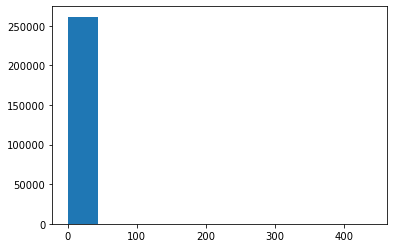

In [6]:
imgrgbdf["dif"]=np.absolute(imgrgbdf["R2"]-imgrgbdf["R"])+np.absolute(imgrgbdf["G2"]-imgrgbdf["G"])+np.absolute(imgrgbdf["B2"]-imgrgbdf["B"])
plt.hist(imgrgbdf.dif)

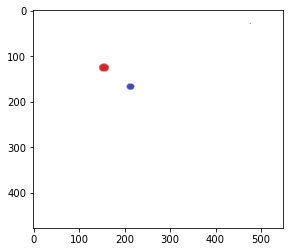

In [7]:
imgrgbdf['Rnou'] = np.where(imgrgbdf['dif']>20, imgrgbdf['R2'], 255)
imgrgbdf['Gnou'] =np.where(imgrgbdf['dif']>20, imgrgbdf['G2'], 255)
imgrgbdf['Bnou'] =np.where(imgrgbdf['dif']>20, imgrgbdf['B2'], 255)
npModificat=imgrgbdf[['Rnou','Gnou','Bnou']].to_numpy()
npModificat=npModificat.reshape(478, 548, 3)
im3=Image.fromarray(npModificat.astype(np.uint8))
plt.imshow(im3)

In [8]:
imgrgbdf=imgrgbdf[(imgrgbdf.Bnou<255)&(imgrgbdf.X>30)]
imgrgbdf

,R,G,B,R2,G2,B2,a,X,Y,dif,Rnou,Gnou,Bnou
64268,147,138,133,168,129,130,64268,117,152,33,168,129,130
64269,146,137,132,168,127,131,64269,117,153,33,168,127,131
64270,146,137,132,162,131,129,64270,117,154,25,162,131,129
64271,146,137,132,161,132,128,64271,117,155,24,161,132,128
64272,146,137,132,167,130,124,64272,117,156,36,167,130,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95565,149,142,136,140,140,168,95565,174,213,43,140,140,168
95566,148,141,135,141,138,165,95566,174,214,40,141,138,165
95567,148,141,135,143,140,167,95567,174,215,38,143,140,167
95568,147,140,134,141,135,169,95568,174,216,46,141,135,169


In [17]:
#detectam centre del blau
blau=imgrgbdf[imgrgbdf.Bnou>150]
#detectam el centre del vermell
vermell=imgrgbdf[imgrgbdf.Bnou<150]
leds=[[int(blau[['X']].mean()[0]),int(blau[['Y']].mean()[0])],[int(vermell[['X']].mean()[0]),int(vermell[['Y']].mean()[0])]]
blaurgb=[int(blau[['Rnou']].mean()[0]),int(blau[['Gnou']].mean()[0]),int(blau[['Bnou']].mean()[0])]
vermellrgb=[int(vermell[['Rnou']].mean()[0]),int(vermell[['Gnou']].mean()[0]),int(vermell[['Bnou']].mean()[0])]
vermellrgb

[208, 53, 61]

In [18]:
#Detectam posició i angle
posX=int((leds[0][0]+leds[1][0])/2)
posY=int((leds[0][1]+leds[1][1])/2)
alfa=np.arctan((leds[1][1]-leds[0][1])/(leds[1][0]-leds[0][0]))*180/np.pi
if (leds[1][0]-leds[0][0])<0:
    alfa=alfa+180
alfa=alfa+90
if alfa>360:
    alfa=alfa-360
#alfa=np.arctan(1)*180/np.pi
retorno=[posX,posY,alfa]
retorno

[145, 182, 323.53076560994816]

In [19]:
leds

[[162, 205], [128, 159]]

In [20]:
blaurgb

[101, 98, 183]